In [879]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

In [880]:
import seaborn as sns
sns.set_palette('Set2')

import matplotlib.pyplot as plt
%matplotlib inline

In [881]:
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from scipy.stats import zscore
import statsmodels.api as sm

In [882]:
import requests
import json
from datetime import datetime
import time

In [883]:
import os
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [934]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score


In [885]:
file = 'CSV_for_EDA.csv'

In [886]:
df_daily = pd.read_csv(file, index_col='date', parse_dates=True)

In [887]:
df_daily.head()
df_daily.tail()

,sales,covers,outside,apparent_temperature,humidity,precip_intensity_max,precip_max_time,precip_prob,precip_type,pressure,summary,temperature,day_of_week,month,closed,ppa
date,,,,,,,,,,,,,,,,
2017-01-02,12814.84,173.0,0,35.59,0.93,0.0243,03:00PM,0.74,rain,1027.76,rain,39.12,0,1,0,74.074220
2017-01-03,12442.11,184.0,0,41.72,0.95,0.0919,05:00PM,0.70,rain,999.38,rain,43.06,1,1,0,67.620163
2017-01-04,11877.64,176.0,0,35.07,0.37,0.0180,12:00AM,0.00,rain,1003.24,clear-night,41.16,2,1,0,67.486591
2017-01-05,14057.79,190.0,0,26.44,0.49,0.0000,05:01AM,0.00,none,1014.93,cloudy,31.49,3,1,0,73.988368
2017-01-06,14531.97,194.0,0,24.24,0.49,0.0023,12:00PM,0.00,snow,1023.22,partly-cloudy-night,29.02,4,1,0,74.907062


,sales,covers,outside,apparent_temperature,humidity,precip_intensity_max,precip_max_time,precip_prob,precip_type,pressure,summary,temperature,day_of_week,month,closed,ppa
date,,,,,,,,,,,,,,,,
2019-06-12,18032.37,246.0,1,65.80,0.56,0.0000,05:01AM,0.00,none,1020.48,partly-cloudy-day,65.80,2,6,0,73.302317
2019-06-13,15209.75,207.0,1,64.06,0.76,0.1721,10:00AM,0.00,rain,1007.55,cloudy,64.06,3,6,0,73.477053
2019-06-14,19688.38,292.0,1,73.42,0.34,0.0191,12:00AM,0.00,rain,1014.65,clear-day,73.42,4,6,0,67.425959
2019-06-15,21059.31,306.0,1,76.24,0.45,0.0054,12:00AM,0.00,rain,1015.18,partly-cloudy-day,76.24,5,6,0,68.821275
2019-06-16,17805.29,242.0,1,75.12,0.79,0.0087,08:00PM,0.15,rain,1009.58,partly-cloudy-day,74.29,6,6,0,73.575579


In [888]:
df_daily[['sales', 'covers', 'ppa']].corr()

,sales,covers,ppa
sales,1.000000,0.896246,0.422744
covers,0.896246,1.000000,0.083227
ppa,0.422744,0.083227,1.000000


In [889]:
df_daily[df_daily['outside'] == 1][['sales', 'covers', 'ppa']].corr()

,sales,covers,ppa
sales,1.000000,0.821097,0.129294
covers,0.821097,1.000000,-0.449352
ppa,0.129294,-0.449352,1.000000


In [890]:
# ## IMPUTE OUTLIERS & CLOSED

# z_thresh = 3

# def impute_outliers(df, *col):
    
#     for c in col:
        
#         for d in df['day_of_week'].unique():
            
#             daily_median = np.median(df[df['day_of_week'] == d][c])
            
#             daily_mean = np.mean(df[df['day_of_week'] == d][c])
            
#             daily_std = np.std(df[df['day_of_week'] ==d ][c])
            
#             df['temp_col'] = np.where((df['day_of_week'] == d) & ((np.abs(df[c] - daily_mean)) > (daily_std * z_thresh)), 1, 0)
            
#             df[c] = np.where(df['temp_col'] == 1, daily_median, df[c])
#             df = df.drop(['temp_col'], axis=1)
        
#     df.drop(['closed'], axis=1)
        
#     return df

### CREATE DAILY SALES DATAFRAME

In [891]:
df_daily['ppa'] = df_daily['sales'] / df_daily['covers']
df_daily['ppa'] = df_daily['ppa'].fillna(value=0)

In [892]:
df_daily = df_daily[['sales', 'covers', 'ppa', 'day_of_week', 'month', 'closed', 'outside']]

## DAILY

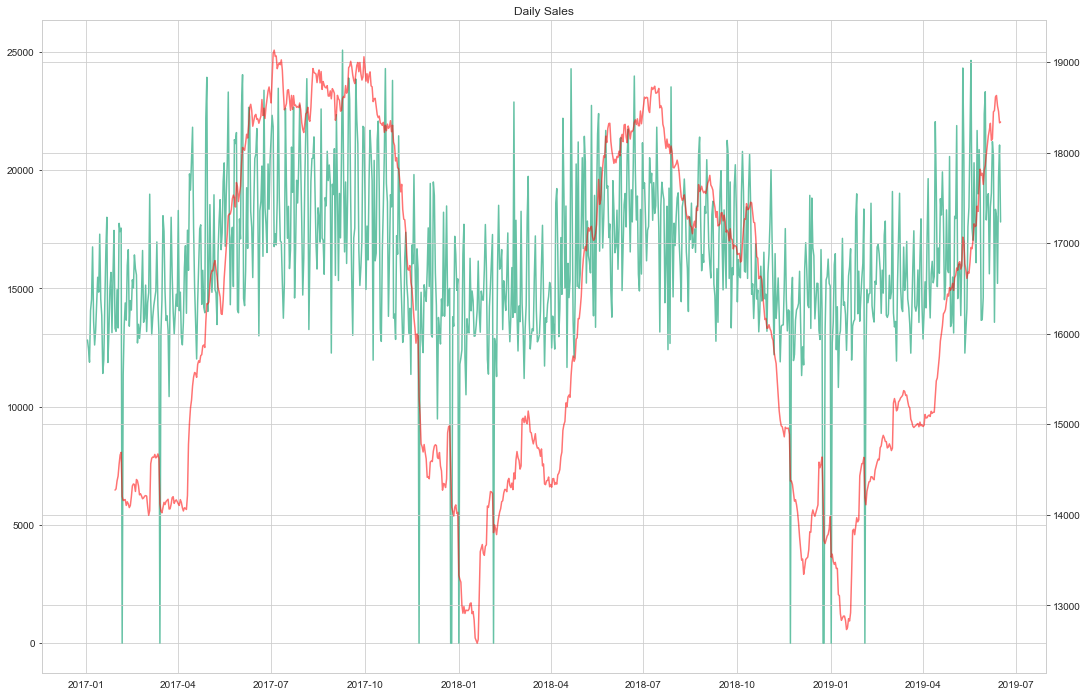

In [893]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,12))

target = 'sales'

sns.lineplot(data=df_daily[target])
ax2 = plt.twinx()
sns.lineplot(data=df_daily[target].rolling(28).mean(), color="r", alpha=0.55, ax=ax2)
plt.title('Daily Sales');

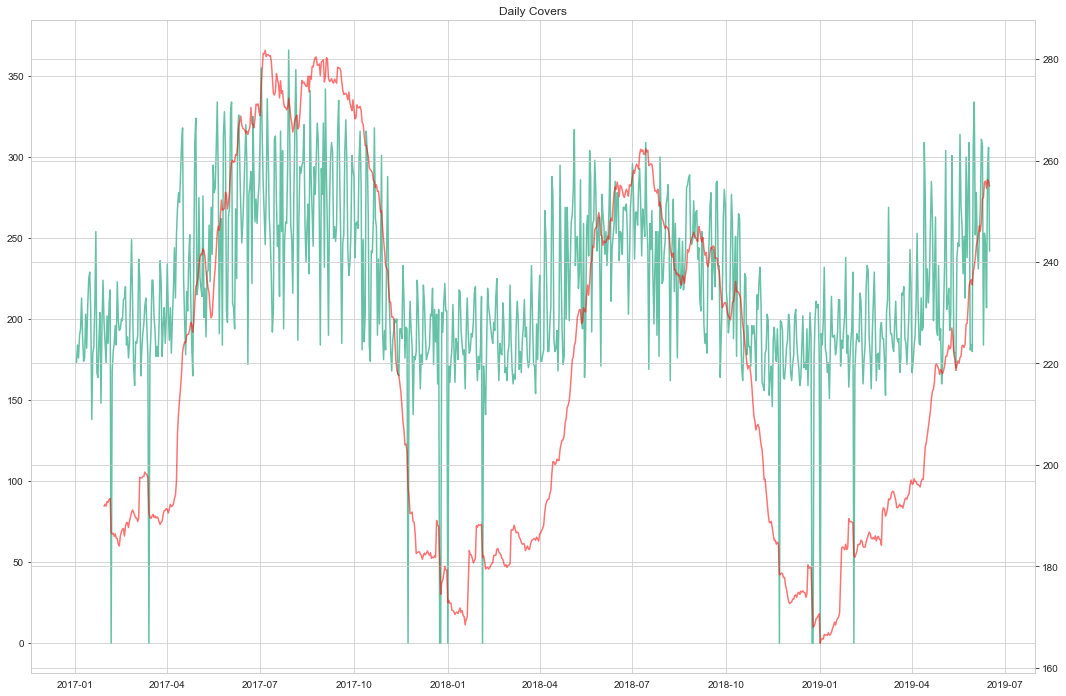

In [894]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,12))

target = 'covers'

sns.lineplot(data=df_daily[target])
ax2 = plt.twinx()
sns.lineplot(data=df_daily[target].rolling(28).mean(), color="r", alpha=0.55, ax=ax2)
plt.title('Daily Covers');

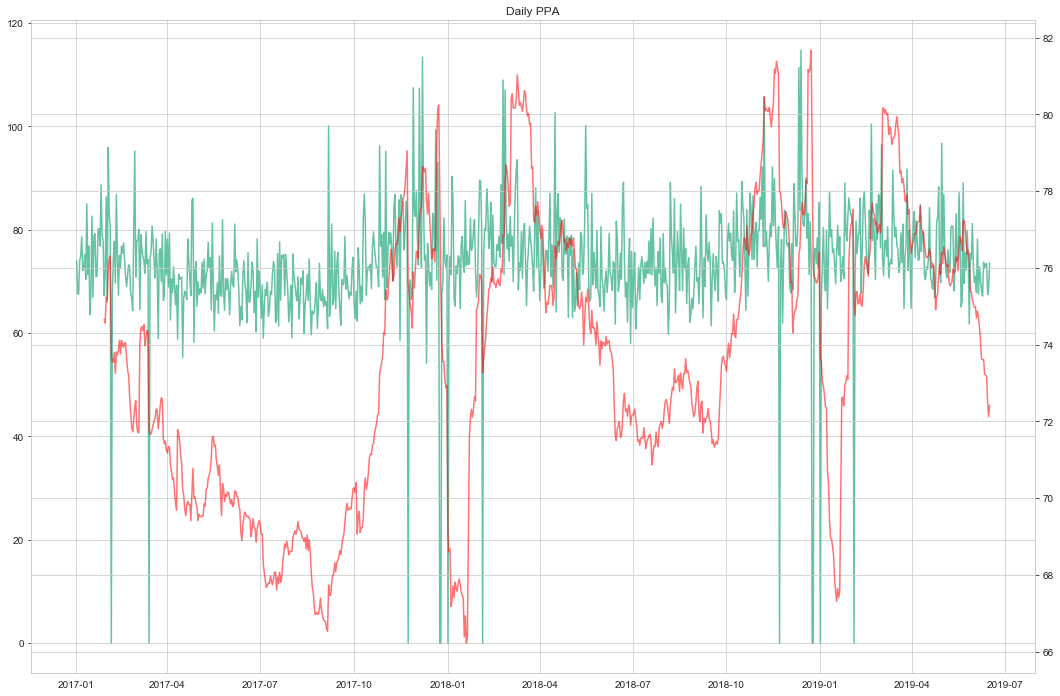

In [895]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,12))

target = 'ppa'

sns.lineplot(data=df_daily[target])
ax2 = plt.twinx()
sns.lineplot(data=df_daily[target].rolling(28).mean(), color="r", alpha=0.55, ax=ax2)
plt.title('Daily PPA');

## TRAIN TEST SPLIT

In [896]:
def train_test_split(df):
    
    # Test / Train / Split
    train_date_start = '2017-01-01'
    train_date_end = '2018-12-31'
    
    y_train = df[pd.to_datetime(train_date_start) : train_date_end]
    y_test = df[pd.to_datetime(train_date_end) + pd.DateOffset(1): ]

    return y_train, y_test

y_train_daily, y_test_daily = train_test_split(df_daily)

### Seasonal Decompose - Daily

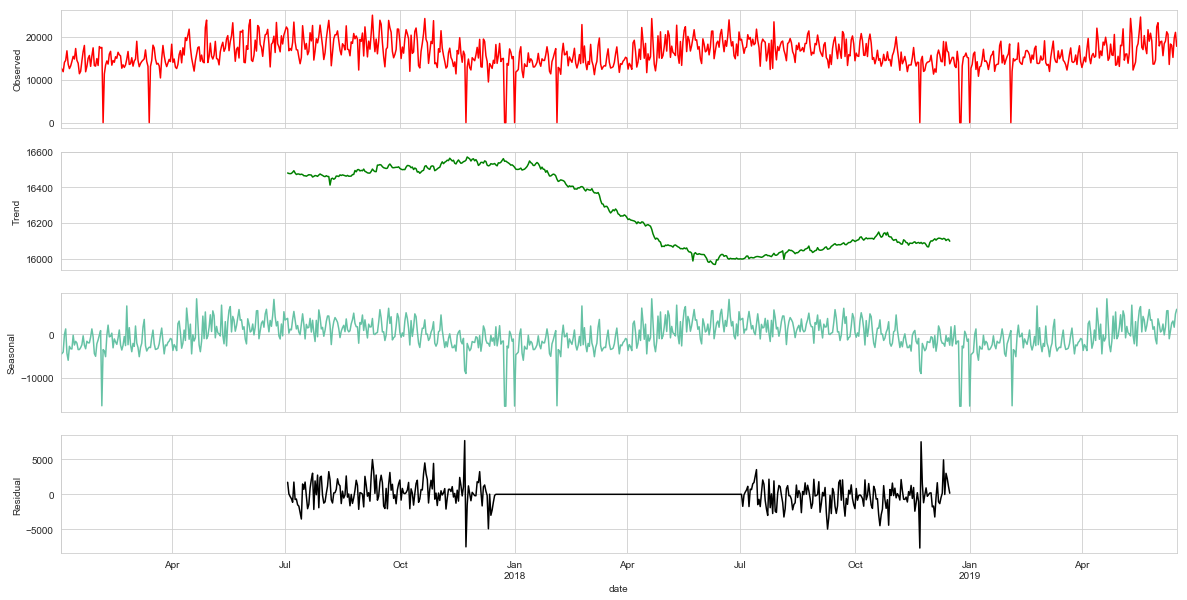

In [897]:
def seasonal_decompose_plots(df, target, freq):
    
    deco = sm.tsa.seasonal_decompose(df[target], model='additive', freq=freq)

    fig, axes = plt.subplots(4, 1, sharex=True, figsize=(20,10))
    
    deco.observed.plot(ax=axes[0], legend=False, color='r')
    axes[0].set_ylabel('Observed')

    deco.trend.plot(ax=axes[1], legend=False, color='g')
    axes[1].set_ylabel('Trend')

    deco.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')

    deco.resid.plot(ax=axes[3], legend=False, color='k')
    axes[3].set_ylabel('Residual');
    
seasonal_decompose_plots(df_daily, 'sales', 365)

### Stationarity

In [898]:
def test_stationarity(df, target, regression):
    
    res = sm.tsa.adfuller(df[target],regression=regression)
    print('p-value -> regression -> {}: {}'.format(regression, res[1]))

test_stationarity(df_daily, 'ppa', regression='c')
test_stationarity(df_daily, 'ppa', regression='ct')
test_stationarity(df_daily, 'ppa', regression='ctt')

p-value -> regression -> c: 2.5773179234340327e-11
p-value -> regression -> ct: 5.761166212712812e-11
p-value -> regression -> ctt: 2.6049641857791725e-10


### Stationarity - Differenced

In [899]:
def test_stationarity(df, target, regression):
    
    res = sm.tsa.adfuller(df[target].diff(1).dropna(),regression=regression)
    print('p-value -> regression -> {}: {}'.format(regression, res[1]))

test_stationarity(df_daily, 'ppa', regression='c')
test_stationarity(df_daily, 'ppa', regression='ct')
test_stationarity(df_daily, 'ppa', regression='ctt')

p-value -> regression -> c: 1.15961800421763e-19
p-value -> regression -> ct: 3.5336432903385805e-17
p-value -> regression -> ctt: 3.8809107959806113e-17


### Auto + Partial Correlation

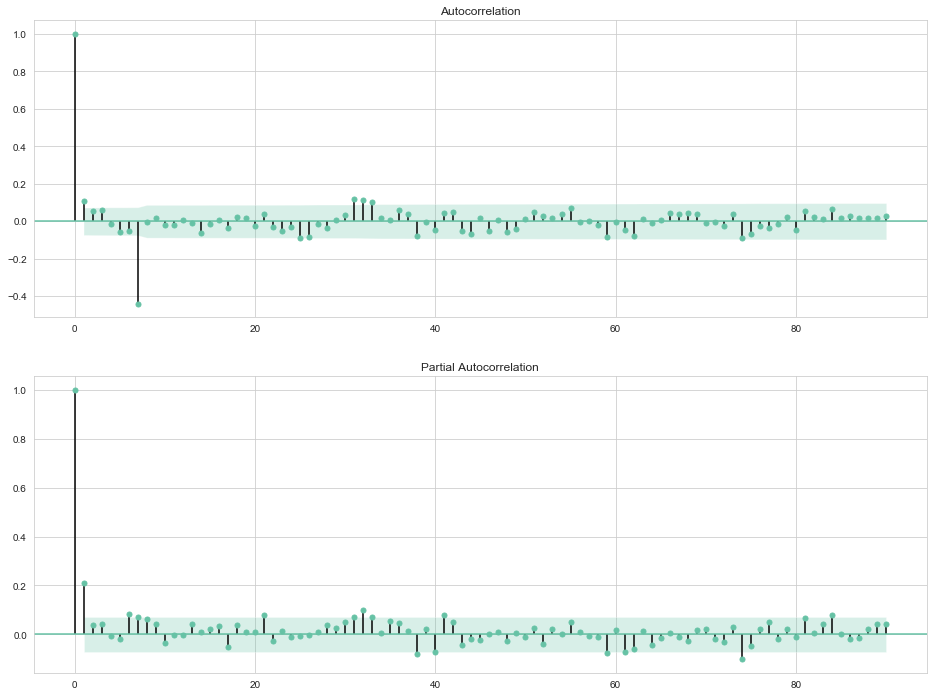

In [949]:
def auto_correlation_plot(df, target, lags):
    
    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(211)

    lags = lags

    #plot the ACF
    fig = sm.graphics.tsa.plot_acf(df[target].diff(7).dropna(), lags=lags, ax=ax1)
    ax2 = fig.add_subplot(212)

    #plot the PACF
    fig = sm.graphics.tsa.plot_pacf(df[target].dropna(), lags=lags, ax=ax2)
    
auto_correlation_plot(y_train_daily, 'ppa', 90)

### ARIMA Model Parameter Search

In [570]:
def find_arima_orders(df, target, trend):
    
    resDiff = sm.tsa.arma_order_select_ic(df[target].diff(7).dropna(), max_ar=7, max_ma=7, ic='aic', trend=trend)
    print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')
    
find_arima_orders(y_train_daily, 'ppa', trend='c')

ARMA(p,q) = (3, 7) is the best.


In [956]:
def arima_model(df, target, p, d, q, P, D, Q, m):

    arima = sm.tsa.statespace.SARIMAX(df[target],order=(p,d,q),seasonal_order=(P,D,Q,m),
                                 enforce_stationarity=False, enforce_invertibility=False,exog=df[['outside', 'closed']])

    res = arima.fit()
    print(res.summary())
    
    return res

res = arima_model(y_train_daily, 'covers', p=3, d=0, q=7, P=0, D=1, Q=1, m=28)

                                 Statespace Model Results                                 
Dep. Variable:                             covers   No. Observations:                  729
Model:             SARIMAX(3, 0, 7)x(0, 1, 1, 28)   Log Likelihood               -3033.325
Date:                            Tue, 18 Jun 2019   AIC                           6094.651
Time:                                    14:46:47   BIC                           6157.648
Sample:                                01-02-2017   HQIC                          6119.060
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
outside       51.2379      2.518     20.352      0.000      46.304      56.172
closed      -186.4228      9.927   

In [957]:
test_start = '12-31-2018'
test_end = '06-16-2019'
exog_forecast = y_test_daily[['outside', 'closed']].values.reshape(y_test_daily.shape[0],2)

pred = res.predict(test_start,test_end, exog=exog_forecast)[1:]
pred_df = pd.DataFrame(pred, index=y_test_daily.index)

print('ARIMA model RMSE: {}'.format(np.sqrt(mean_squared_error(y_test_daily['covers'], pred))))

ARIMA model RMSE: 21.902897538516157


In [958]:
pred_df = pred_df.rename(columns={0: 'pred_covers'})

In [959]:
rmse = np.sqrt(mean_squared_error(y_test_daily['covers'], pred_df['pred_covers']))

In [961]:
rmse

21.902897538516157

In [960]:
r2 = r2_score(y_test_daily['covers'], pred_df['pred_covers'])
r2

0.769141056451446


 Mean Absolute Error:  4.694911274712065


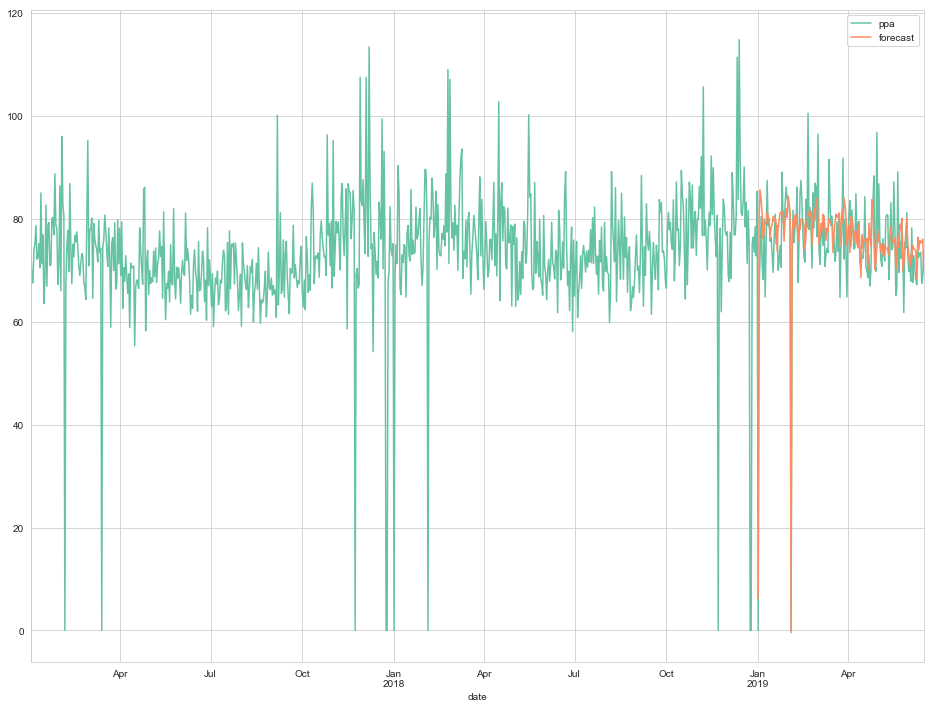

In [955]:
def sarimax_forecast(df, model, target, start_period, forecast_periods):
    
    df['forecast'] = model.forecast(steps=167, dynamic=False, exog=exog_forecast)
    df[[target, 'forecast']].plot(figsize=(16,12))
    
    print('\n', 'Mean Absolute Error: ', np.abs(df[start_period:]['ppa']- df[start_period:]['forecast']).sum()/len(df[start_period:]))
    
    return df

df_forecast = sarimax_forecast(df_daily, res, 'ppa', test_start, test_end)

In [932]:
pred_df = df_daily.merge(pred_df, on='date', how='left')['2019']
pred_df = pred_df.rename(columns={0: 'sales'})

In [907]:
df_eval = df_forecast['2019':]
rmse = np.sqrt(((df_eval['ppa'] - df_eval['forecast'])**2).sum() / len(df_eval['ppa']))

In [911]:
pred_df

,sales_x,covers_x,ppa_x,day_of_week_x,month_x,closed_x,outside_x,forecast,sales_y,covers_y,ppa_y,day_of_week_y,month_y,closed_y,outside_y,pred_ppa
date,,,,,,,,,,,,,,,,
2019-01-01,0.000,0.0,0.000000,1,1,1,0,6.281795,0.000,0.0,0.000000,1.0,1.0,1.0,0.0,6.281795
2019-01-02,12685.240,191.0,66.414869,2,1,0,0,80.328907,12685.240,191.0,66.414869,2.0,1.0,0.0,0.0,80.328907
2019-01-03,13580.960,184.0,73.809565,3,1,0,0,85.517093,13580.960,184.0,73.809565,3.0,1.0,0.0,0.0,85.517093
2019-01-04,16002.750,199.0,80.415829,4,1,0,0,83.712033,16002.750,199.0,80.415829,4.0,1.0,0.0,0.0,83.712033
2019-01-05,16463.620,232.0,70.963879,5,1,0,0,81.003838,16463.620,232.0,70.963879,5.0,1.0,0.0,0.0,81.003838
2019-01-06,12405.140,182.0,68.160110,6,1,0,0,76.127574,12405.140,182.0,68.160110,6.0,1.0,0.0,0.0,76.127574
2019-01-07,14222.670,178.0,79.902640,0,1,0,0,77.220090,14222.670,178.0,79.902640,0.0,1.0,0.0,0.0,77.220090
2019-01-08,10811.320,167.0,64.738443,1,1,0,0,79.386259,10811.320,167.0,64.738443,1.0,1.0,0.0,0.0,79.386259
2019-01-09,12985.090,173.0,75.058324,2,1,0,0,79.142999,12985.090,173.0,75.058324,2.0,1.0,0.0,0.0,79.142999


In [908]:
rmse

6.100026500411188

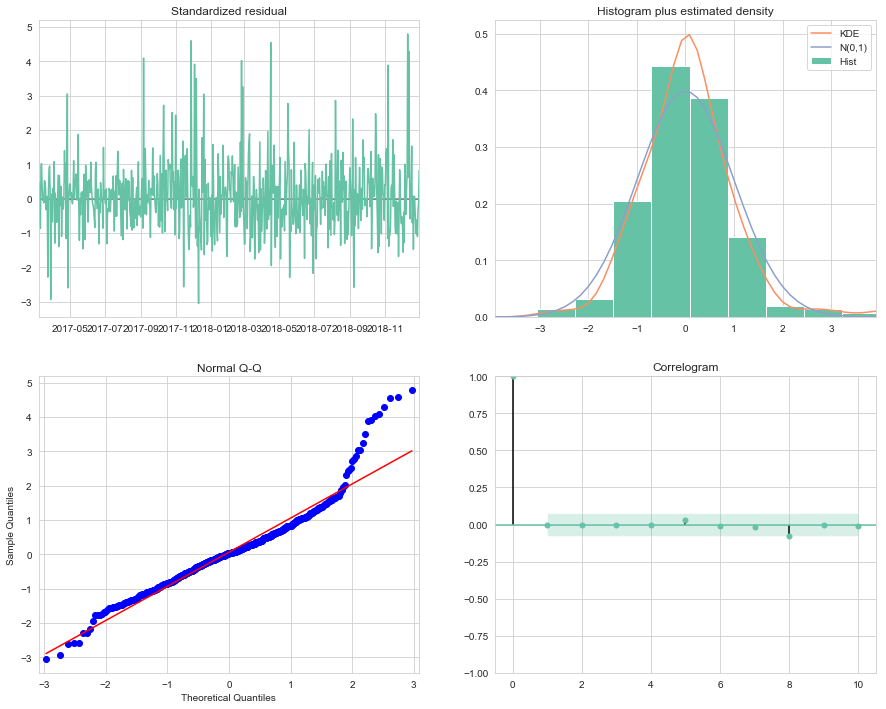

In [909]:
res.plot_diagnostics(figsize=(15, 12));

In [656]:
# Fit Model on Entire Dataset
final_model = arima_model(df_daily, 'ppa', p=3, d=0, q=7, P=0, D=1, Q=1, m=7)

                                 Statespace Model Results                                
Dep. Variable:                               ppa   No. Observations:                  896
Model:             SARIMAX(3, 0, 7)x(0, 1, 1, 7)   Log Likelihood               -2932.601
Date:                           Tue, 18 Jun 2019   AIC                           5891.203
Time:                                   11:02:47   BIC                           5953.253
Sample:                               01-02-2017   HQIC                          5914.940
                                    - 06-16-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
outside       -3.7073      0.664     -5.586      0.000      -5.008      -2.407
ar.L1          0.0047      0.036      0.131

In [649]:
test_start = '01-02-2017'
test_end = '06-17-2019'
exog_forecast = df_daily[['outside']].values.reshape(df_daily.shape[0],1)

pred = final_model.predict(test_start,test_end, exog=exog_forecast)[1:]

print('ARIMA model RMSE: {}'.format(np.sqrt(mean_squared_error(df_daily['ppa'], pred))))

ValueError: Provided exogenous values are not of the appropriate shape. Required (1, 1), got (896, 1).

In [473]:
exog_forecast = 
final_model.forecast(steps=7, Dynamic=True)

2019-06-17    70.644774
2019-06-18    73.309674
2019-06-19    73.998950
2019-06-20    74.760476
2019-06-21    74.237312
2019-06-22    74.112664
2019-06-23    68.106091
Freq: D, dtype: float64

In [ ]:
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation

target = 'sales'

dfp = dfp[[target]].reset_index()
dfp = dfp.rename(columns={'date': 'ds', target:'y'})

In [ ]:
m = Prophet()
m.fit(dfp)

In [ ]:
future = m.make_future_dataframe(periods=30)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
df_cv = cross_validation(m, initial='730 days', period = '165 days', horizon = '164 days')
df_cv

In [ ]:
df_p = performance_metrics(df_cv)
df_p